# Ordinary Differential Equation Solvers
## Christina Lee

For a while I've been working on research and a behemoth 4-part post on Exact Diagonalization of the Spin 1/2 Heisenburg 1D Chain.  So let me take a break from staring at pages of fermionic algebra to write to you all about the simple computational methods of solving Ordinary Differential Equations.  

<b>WARNING:</b> If you actually need to solve a troublesome differential equation for a research problem, use a package, like [DifferentialEquations](https://github.com/JuliaDiffEq/DifferentialEquations.jl).  These packages have much better error handling and optimization.

Nonetheless, in order to work with ANY computational differential equation solver, you need to understand the fundementals of routines like Euler and Runge Kutta, their error propogation, and where they can go wrong. Otherwise, you might misinterpret the results of more advanced routines. 

Lets first add our plotting package and colors.

In [1]:
using Gadfly
# Solarized Colors that I like working with
# http://ethanschoonover.com/solarized
using Colors
base03=parse(Colorant,"#002b36");
base02=parse(Colorant,"#073642");
base01=parse(Colorant,"#586e75");
base00=parse(Colorant,"#657b83");
base0=parse(Colorant,"#839496");
base1=parse(Colorant,"#839496");
base2=parse(Colorant,"#eee8d5");
base3=parse(Colorant,"#fdf6e3");

yellow=parse(Colorant,"#b58900");
orange=parse(Colorant,"#cb4b16");
red=parse(Colorant,"#dc322f");
magenta=parse(Colorant,"#d33682");
violet=parse(Colorant,"#6c71c4");
blue=parse(Colorant,"#268bd2");
cyan=parse(Colorant,"#3aa198");
green=parse(Colorant,"#859900");



\begin{equation}
\frac{d}{d t}x=x \;\;\;\;\;\;\; x(t)=e^t
\end{equation}

In [2]:
function f1(t::Float64,x::Array{Float64,1})
    return x[1]
end
f=Function[]
push!(f,f1)

1-element Array{Function,1}:
 f1

In [3]:
function g1(t,x::Array{Float64,1})
    return -15*x[1]
end
g=Function[]
push!(g,g1)

1-element Array{Function,1}:
 g1

In [11]:
function Euler(f::Array{Function,1},t0::Float64,x::Array{Float64,1},h::Float64)
    d=length(f)
    xp=copy(x)
    for ii in 1:d
        xp[ii]+=h*f[ii](t0,x)
    end
    
    return t0+h,xp
end

Euler (generic function with 1 method)

## Implicit Method or Backward Euler

\begin{equation}
x_{k+1}+\delta t f(t_{k+1},x_{k+1})= x_k
\end{equation}

If $f(t,x)$ has a form that is invertible, we can form a specific expression for the next step.  For example, if we use our exponential,

\begin{equation}
x_{k+1}+\delta tx_{k+1}=x_k
\end{equation}
\begin{equation}
x_{k+1}=\frac{x_k}{1+\delta t}
\end{equation}

In [13]:
function Implicit(f::Array{Function,1},t0::Float64,x::Array{Float64,1},h::Float64)
    return t0+h,x[1]/(1-h)
end

Implicit (generic function with 2 methods)

## 2nd Order Runge-Kutta

So the Euler Method, we could just make more, tinier steps to achieve more precise results.
\begin{equation}
y_{n+1}=y_n+h f(y_n,x_n) + \frac{h^2}{2} f^{\prime}(y_n,x_n)+ \mathcal{O} (h^3)
\end{equation}
Define
\begin{equation}
k_1=f(x_n,y_n)
\end{equation}

\begin{equation}
f^{\prime}(x_n,y_n)=\frac{f(x_n+h/2,y_n+k_1/2)-k_1}{h/2}+\mathcal{O}(h^2)
\end{equation}

\begin{equation}
y_{n+1}=y_n+hf(x_n+h/2,y_n+k_1/2)+\mathcal{O}(h^3)
\end{equation}
Finally 

In [6]:
function RK2(f::Array{Function,1},t0::Float64,x::Array{Float64,1},h::Float64)
    d=length(f)
    
    xp=copy(x)
    xk1=copy(x)
    
    for ii in 1:d
        xk1[ii]+=f[ii](t0,x)*h/2
    end
    for ii in 1:d
        xp[ii]+=f[ii](t0+h/2,xk1)*h 
    end
    
    return t0+h,xp
end

RK2 (generic function with 1 method)

In [7]:
function RK4(f::Array{Function,1},t0::Float64,x::Array{Float64,1},h::Float64)
    d=length(f)
    
    k1=zeros(x)
    k2=zeros(x)
    k3=zeros(x)
    k4=zeros(x)
    
    for ii in 1:d
        k1[ii]=h*f[ii](t0,x)
    end
    for ii in 1:d
        k2[ii]=h*f[ii](t0+h/2,x+k1/2)
    end
    for ii in 1:d
        k3[ii]=h*f[ii](t0+h/2,x+k2/2) 
    end
    for ii in 1:d
        k4[ii]=h*f[ii](t0+h,x+k3)
    end
    
    return t0+h,x+(k1+2*k2+2*k3+k4)/6
end

RK4 (generic function with 1 method)

In [8]:
RK4(f,0.,[1.],.1), exp(.1)

((0.1,[1.10517]),1.1051709180756477)

In [46]:
function Stepper(f::Array{Function,1},Method::Function,t0::Float64,
        x0::Array{Float64,1},h::Float64,N::Int64)
    d=length(f)
    ts=zeros(Float64,N+1)
    xs=zeros(Float64,d,N+1)
    
    ts[1]=t0
    xs[:,1]=x0
    
    for i in 2:(N+1)
        ts[i],xs[:,i]=Method(f,ts[i-1],xs[:,i-1],h)
    end
    
    return ts,xs
end

Stepper (generic function with 1 method)

In [38]:
N=1000
xf=10
t0=0.
x0=[1.]
dt=(xf-t0)/N

tEU,xEU=Stepper(f,Euler,t0,x0,dt,N);
tIm,xIm=Stepper(f,Implicit,t0,x0,dt,N);
tRK2,xRK2=Stepper(f,RK2,t0,x0,dt,N);
tRK4,xRK4=Stepper(f,RK4,t0,x0,dt,N);

xi=tEU
yi=exp(xi);

errEU=reshape(xEU[1,:],N+1)-yi
errIm=reshape(xIm[1,:],N+1)-yi
errRK2=reshape(xRK2[1,:],N+1)-yi;
errRK4=reshape(xRK4[1,:],N+1)-yi;

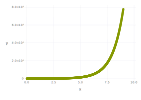

In [32]:
plot(x=tEU,y=xEU[1,:],Geom.point,
Theme(highlight_width=0pt,default_color=green,
default_point_size=3pt))

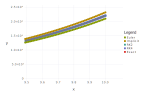

In [39]:
lEU=layer(x=tEU,y=xEU[1,:],Geom.point,
Theme(highlight_width=0pt,default_color=green,
default_point_size=3pt))

lIm=layer(x=tIm,y=xIm[1,:],Geom.point,
Theme(highlight_width=0pt,default_color=yellow,
default_point_size=3pt))

lRK2=layer(x=tRK2,y=xRK2[1,:],Geom.point,
Theme(highlight_width=0pt,default_color=cyan,
default_point_size=2pt))

lRK4=layer(x=tRK4,y=xRK4[1,:],Geom.point,
Theme(highlight_width=0pt,default_color=violet,
default_point_size=4pt))

lp=layer(x->e^x,-.1,10,Geom.line,Theme(default_color=red))


plot(lp,lEU,lIm,lRK2,lRK4,
Guide.manual_color_key("Legend",["Euler","Implicit","RK2","RK4","Exact"],
[green,yellow,cyan,violet,red]),
Coord.cartesian(xmin=9.5,xmax=10.1))

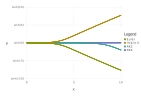

In [40]:
lEU=layer(x=xi,y=errEU,Geom.point,
Theme(highlight_width=0pt,default_color=green,
default_point_size=1pt))

lIm=layer(x=xi,y=errIm,Geom.point,
Theme(highlight_width=0pt,default_color=yellow,
default_point_size=1pt))

lRK2=layer(x=xi,y=errRK2,Geom.point,
Theme(highlight_width=0pt,default_color=cyan,
default_point_size=1pt))

lRK4=layer(x=xi,y=errRK4,Geom.point,
Theme(highlight_width=0pt,default_color=violet,
default_point_size=1pt))

plot(lEU,lIm,lRK2,lRK4,Scale.y_asinh,
Guide.manual_color_key("Legend",["Euler","Implicit","RK2","RK4"],
[green,yellow,cyan,violet]))

In [49]:
t0=0.
tf=1.
dx=tf-t0
x0=[1.]

dt=collect(.001:.0001:.01)

correctans=exp(xf)
errfEU=zeros(dt)
errfIm=zeros(dt)
errfRK2=zeros(dt)
errfRK4=zeros(dt)



for ii in 1:length(dt)
    N=round(Int,dx/dt[ii])
    dt[ii]=dx/N
    
    tEU,xEU=Stepper(f,Euler,t0,x0,dt[ii],N);
    tIm,xIm=Stepper(f,Implicit,t0,x0,dt[ii],N);
    tRK2,xRK2=Stepper(f,RK2,t0,x0,dt[ii],N);
    tRK4,xRK4=Stepper(f,RK4,t0,x0,dt[ii],N);
    
    errfEU[ii]=xEU[1,end]-correctans
    errfIm[ii]=xIm[1,end]-correctans
    errfRK2[ii]=xRK2[1,end]-correctans
    errfRK4[ii]=xRK4[1,end]-correctans
end

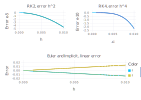

In [50]:
lEU=layer(x=dt,y=errfEU,Geom.point,
Theme(highlight_width=0pt,default_color=green,
default_point_size=1pt))

lIm=layer(x=dt,y=errfIm,Geom.point,
Theme(highlight_width=0pt,default_color=yellow,
default_point_size=1pt))

lRK2=layer(x=dt,y=errfRK2*10^5,Geom.point,
Theme(highlight_width=0pt,default_color=cyan,
default_point_size=1pt))

lRK4=layer(x=dt,y=errfRK4*10^10,Geom.point,
Theme(highlight_width=0pt,default_color=violet,
default_point_size=1pt))

tempEU(x)=(errfEU[end]*x/.01)
tempIm(x)=(errfIm[end]*x/.01)
le=layer([tempEU,tempIm],0,.01,Geom.line)

temp2(x)=(errfRK2[end]*(x/.01)^2*10^5)
l2=layer(temp2,0,.01,Geom.line)

temp4(x)=(errfRK4[end]*(x/.01)^4*10^10)
l4=layer(temp4,0,.01,Geom.line)

xl=Guide.xlabel("h")
ylrk2=Guide.ylabel("Error e-5")
ylrk4=Guide.ylabel("Error e-10")
yl=Guide.ylabel("Error")

pEU=plot(lEU,lIm,le,xl,yl,Guide.title("Euler and Implicit, linear error"))
p2=plot(lRK2,l2,xl,ylrk2,Guide.title("RK2, error h^2"))
p4=plot(lRK4,l4,xl,ylrk4,Guide.title("RK4, error h^4"))
vstack(hstack(p2,p4),pEU)